# <font color='Blue'>Predicting yearly amount spent by a customer on the app</font>


### <font color='red'> Importing necessary libraries </font>

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

### <font color='red'> Loading the dataset </font>

In [10]:
df = pd.read_csv (r'C:\Users\91928\Desktop\jupyter\ML linear reg\EcommerceCustomers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### <font color='red'> Exploratory Data Analysis </font>

#### Checking for any null values

In [47]:
df.isnull().sum().sum() 

0

Therefore, we have no null values in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

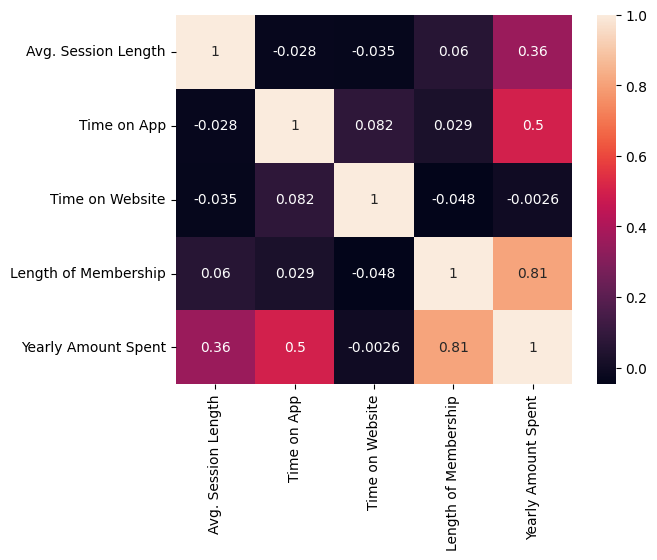

In [23]:
sns.heatmap(df.corr(), annot=True)

#### From the correlation, we can see that 'Length of Membership' and 'Time on App' attributes have the most impact on amount spent

In [21]:
fig = px.histogram(df, x='Length of Membership')
fig.update_layout(bargap=0.1)
fig.show()

#### Here, we can see that majority of the people have length of membership between 3 to 4 years

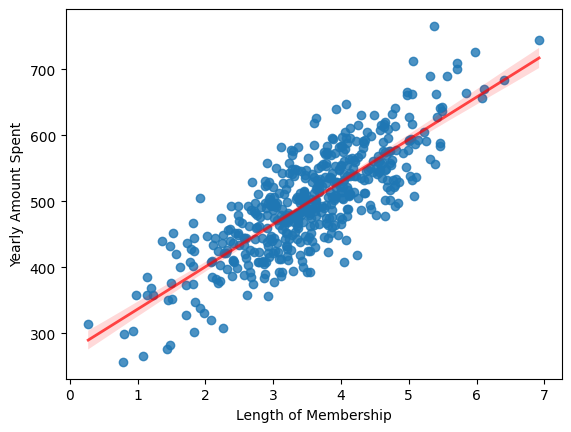

In [38]:
sns.regplot(x="Length of Membership", y="Yearly Amount Spent", data=df, line_kws={"color":"r","alpha":0.7,"lw":2});

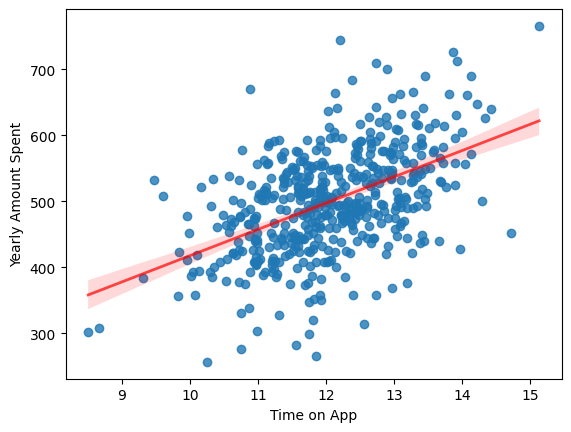

In [40]:
sns.regplot(x="Time on App", y="Yearly Amount Spent", data=df, line_kws={"color":"r","alpha":0.7,"lw":2});

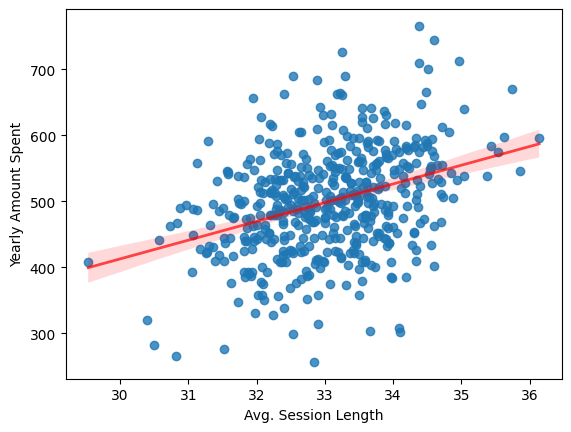

In [42]:
sns.regplot(x="Avg. Session Length", y="Yearly Amount Spent", data=df, line_kws={"color":"r","alpha":0.7,"lw":2});

#### From the above 3 plots we can see that these have linear relationship with yearly amount spent. So we will use linear regression to train the model and predict future trends.

## <font color='red'> Model </font>

In this case, our linear regression equation will look like: <b>amount = w1 x Length of Membership + w2 x Time on App + w3 x Avg. Session Length + b </b> where,

w1 = weight of coeff 1 <br>
w2 = weight of coeff 2 <br>
w3 = weight of coeff 3 <br>
b = intercept of the line

In [102]:
inputs = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [103]:
target = df['Yearly Amount Spent']

In [104]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=101)

### Training the model

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lm = LinearRegression()

In [193]:
lm.fit(X_train,y_train)

LinearRegression()

In [194]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [195]:
lm.intercept_

-1047.9327822502391

### Predicting the data

In [196]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

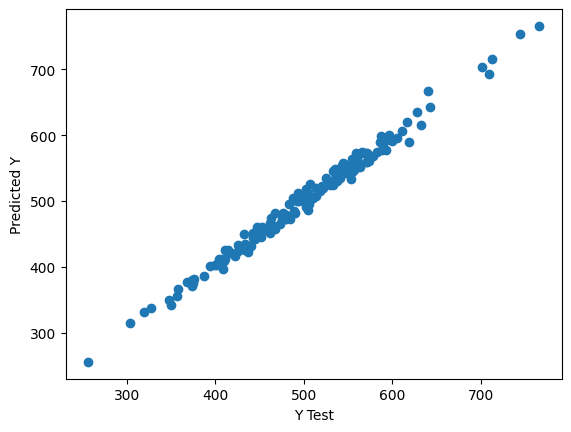

In [197]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Model Performance

In [198]:
from sklearn import metrics

In [199]:
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,predictions))
print('Root Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error :   7.228148653430826
Mean Squared Error :   79.81305165097427
Root Mean Absolute Error :   8.933815066978624


### Residuals

C:\Users\91928\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



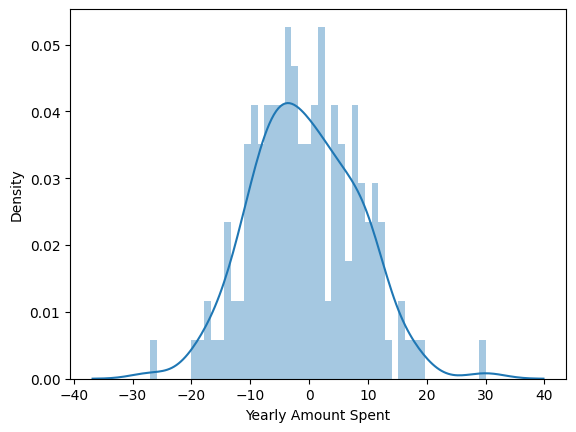

In [209]:
sns.distplot(y_test - predictions, bins=50);

### Conclusion

In [210]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Thus, instead of focusing on the website, the company should try to improve app experience since most of the customer's time is spent on the app.